In [2]:
from qiskit.ignis.verification import state_tomography_circuits, StateTomographyFitter
from qiskit.tools import job_monitor

from MPS_decomposition.hdf5_reader import Hdf5Reader
from MPS_decomposition.basic_decomposer import BasicDecomposer
from qiskit import *
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
IBMQ.save_account(
    '280beccbee94456a161a6cbc217e1366bc278bf60e22bd30281fa0ca5bec6e50897278ef818f3c53f6700e04b9ed32ea364195044413b7e02836a79d886b03d9',
    overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-research')

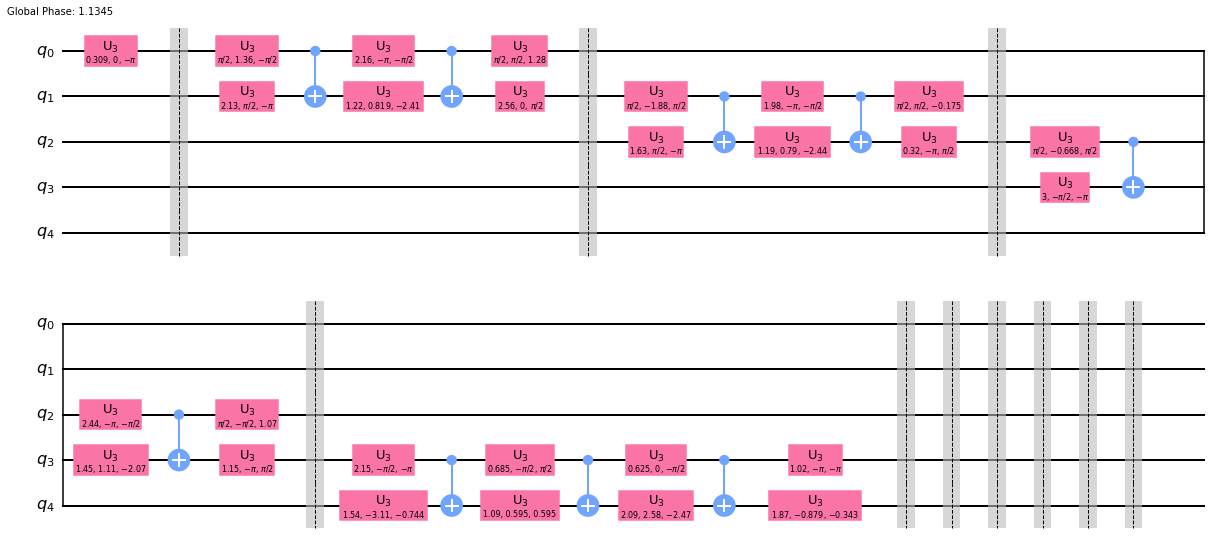

In [23]:
reader1 = Hdf5Reader("new.h5")
circuit1 = BasicDecomposer(reader1).decompose(barrier=True)
reader2 = Hdf5Reader("hardcase_3layers2.h5")
circuit2 = BasicDecomposer(reader2).decompose(barrier=True)
circuit1.draw(output='mpl')

In [20]:
reversed_circuit1 = circuit1.inverse()
reversed_circuit2 = circuit2.inverse()

In [21]:
import qiskit.quantum_info as qi
import numpy as np

state_vector1 = qi.Statevector.from_instruction(reversed_circuit1)
state_vector2 = qi.Statevector.from_instruction(reversed_circuit2)
vector_dot1 = np.vdot(state_vector1.data, reader1.get_psi())
vector_dot2 = np.vdot(state_vector2.data, reader2.get_psi())
print("Scalar product (circuit 1): " , np.abs(vector_dot1))
print("Scalar product (circuit 2): " , np.abs(vector_dot2))

Scalar product (circuit 1):  0.5701535665801214
Scalar product (circuit 2):  0.44336241476021204


## $$\huge \text{Simulator}$$

In [9]:
# Generate the state tomography circuits.
tomo_circuit1 = state_tomography_circuits(reversed_circuit1, reversed_circuit1.qubits)
job1 = qiskit.execute(tomo_circuit1, Aer.get_backend('qasm_simulator'), shots=8000)
job_monitor(job1)
tomo_fitter_circuit1 = StateTomographyFitter(job1.result(), tomo_circuit1)

rho_fit_circuit1 = tomo_fitter_circuit1.fit(method='lstsq')
F_1 = qi.state_fidelity(rho_fit_circuit1, reader1.get_psi())
print('State Fidelity (circuit 1): F = {:.5f}'.format(F_1))

c:\python-interpreters\lib\site-packages\qiskit\ignis\verification\tomography\basis\circuits.py:468: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  prep += circuit
c:\python-interpreters\lib\site-packages\qiskit\circuit\quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)
c:\python-interpreters\lib\site-packages\qiskit\ignis\verification\tomography\basis\circuits.py:478: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circ = prep + meas
c:\python-interpreters\lib\site-packages\qiski

Job Status: job has successfully run
State Fidelity (circuit 1): F = 0.32488


In [ ]:
# Generate the state tomography circuits.
tomo_circuit2 = state_tomography_circuits(reversed_circuit2, reversed_circuit2.qubits)
job2 = qiskit.execute(tomo_circuit1, Aer.get_backend('qasm_simulator'), shots=8000)
job_monitor(job2)
tomo_fitter_circuit2 = StateTomographyFitter(job2.result(), tomo_circuit2)

rho_fit_circuit2 = tomo_fitter_circuit2.fit(method='lstsq')
F_2 = qi.state_fidelity(rho_fit_circuit2, reader1.get_psi())
print('State Fidelity (circuit 2): F = {:.5f}'.format(F_2))